# Least Squares Method

In [1]:
import numpy as np
import scipy as sp
import pylab as pl
from scipy.optimize import leastsq

Fitting Parameters:  [ 0.50180308  1.37446066  1.8086358   1.48901727  0.01847119 -2.78643297
 -5.35102919  2.59847234  0.46610101]


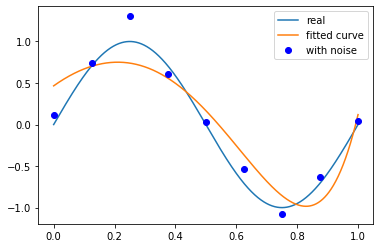

In [34]:
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, y, x):
    regularization = 0.005
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(regularization) * p)
    return ret

n = 9

x = np.linspace(0, 1, 9)
x_points = np.linspace(0,1,1000)

y0 = np.sin(2 * np.pi * x)
y1 = [np.random.normal(0,0.1) + y for y in y0] #add normal distribution noise

p_init = np.random.randn(n) #p_init 1*9

plsq = leastsq(residuals_func, p_init, args=(y1, x))

print ('Fitting Parameters: ', plsq[0])

pl.plot(x_points, np.sin(2* np.pi * x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve')
pl.plot(x, y1, 'bo', label='with noise')
pl.legend()
pl.show()

